In [270]:
import random
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from rdkit import DataStructs
from rdkit.Chem import PandasTools, AllChem
import tensorflow as tf

In [273]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    tf.random.set_seed(seed)

seed_everything(42) # Seed 고정

In [162]:
train = pd.read_csv('./train.csv')
train = train.groupby('SMILES').mean().reset_index()
test = pd.read_csv('./test.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_7112\946614270.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train = train.groupby('SMILES').mean().reset_index()


C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


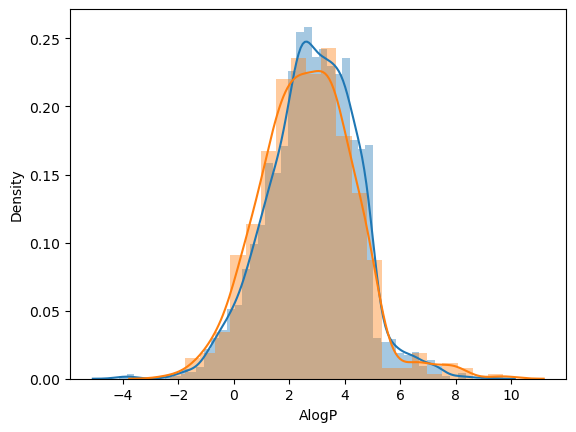

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


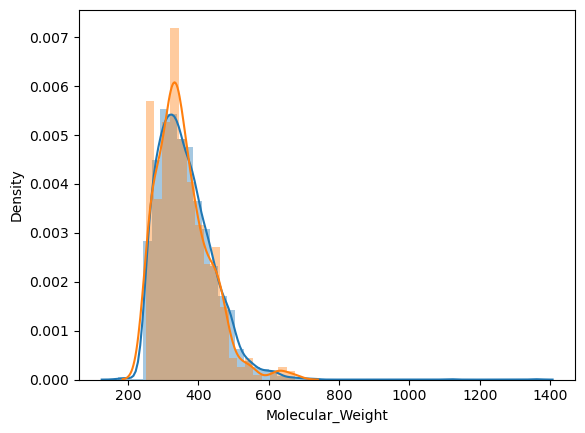

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


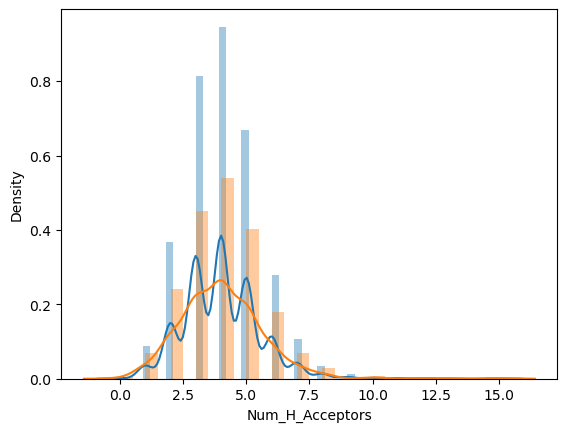

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


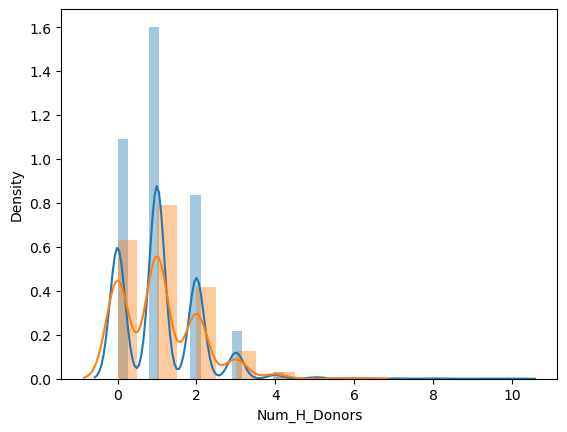

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


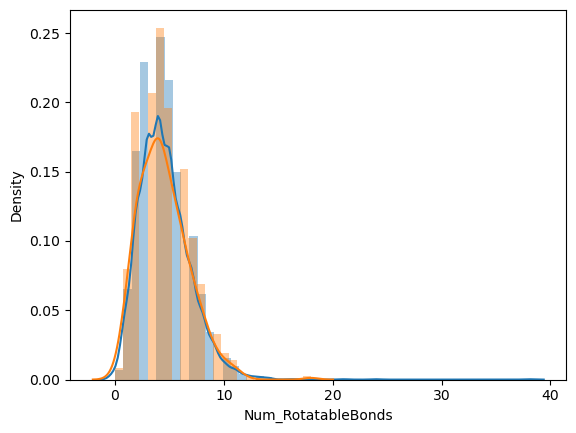

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


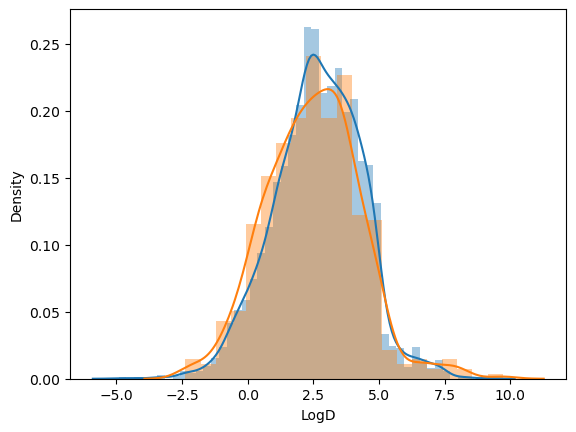

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i])


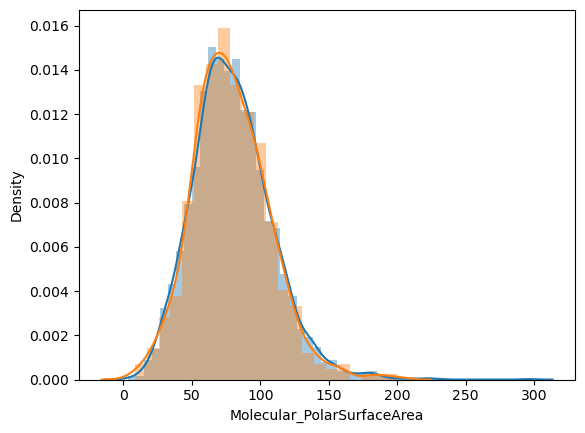

C:\Users\User\AppData\Local\Temp\ipykernel_7112\3371867915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i])


TypeError: float() argument must be a string or a number, not 'Mol'

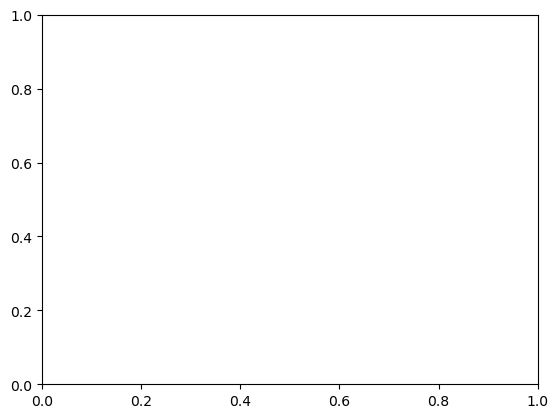

In [205]:
import seaborn as sns
for i in train.columns[3:]:
    sns.distplot(train[i])
    sns.distplot(test[i])
    plt.show()

In [277]:
train = train[train.Num_H_Donors < 7]
train = train[train.Num_RotatableBonds < 20]
train = train[train.AlogP > -3]
print(train.describe())
print(test.describe())

# test.describe()

               MLM          HLM        AlogP  Molecular_Weight  \
count  3441.000000  3441.000000  3441.000000       3441.000000   
mean     37.251523    53.116251     2.839206        362.134844   
std      35.646792    36.056933     1.578057         75.323242   
min       0.000000     0.000000    -2.414000        172.180000   
25%       2.442000    16.029000     1.829000        304.343000   
50%      25.940000    58.066000     2.878000        349.339000   
75%      70.700000    87.770000     3.954000        408.371000   
max     131.720000   135.336000     9.190000        730.737000   

       Num_H_Acceptors  Num_H_Donors  Num_RotatableBonds         LogD  \
count      3441.000000   3441.000000         3441.000000  3441.000000   
mean          3.983726      1.083987            4.530950     2.678582   
std           1.441604      0.923959            2.232487     1.643904   
min           0.000000      0.000000            0.000000    -3.322000   
25%           3.000000      0.000000    

In [278]:
PandasTools.AddMoleculeColumnToFrame(train,'SMILES','Molecule')
PandasTools.AddMoleculeColumnToFrame(test,'SMILES','Molecule')
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 8, nBits=4096*2)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

train["FPs"] = train.Molecule.apply(mol2fp)
test["FPs"] = test.Molecule.apply(mol2fp)

droping = []
tp = pd.DataFrame(train['SMILES'].str.contains('e'))
droping.extend(list(tp[tp['SMILES'] == True].index))
tp = pd.DataFrame(train['SMILES'].str.contains('I'))
droping.extend(list(tp[tp['SMILES'] == True].index))
tp = pd.DataFrame(train['SMILES'].str.contains('6'))
droping.extend(list(tp[tp['SMILES'] == True].index))

train = train.drop(droping)

feed = [list(i) for i in train.FPs]
# feed.extend([list(reversed(i)) for i in train.FPs])
feed = np.array(feed)
feed_test = np.array([list(i) for i in test.FPs])

In [279]:
feed.shape

(3441, 8192)

In [84]:
tp = [[j for j in i] for i in train['SMILES']]
ans = []
for i in tp:
    ans.extend(i)
    
import collections
data = pd.DataFrame([collections.Counter(ans).keys(),collections.Counter(ans).values()]).transpose()
data.columns = ['atom','counter']
data.sort_values('counter',ascending=False).reset_index(drop=True)

,atom,counter
0,c,39264
1,C,25700
2,(,14618
3,),14618
4,1,10186
5,O,8400
6,2,8150
7,n,6743
8,=,5689
9,N,4742


In [85]:
test['SMILES'] = [i.replace('P','') for i in test['SMILES']]
tp = [[j for j in i] for i in test['SMILES']]
ans = []
for i in tp:
    ans.extend(i)
    
import collections
data = pd.DataFrame([collections.Counter(ans).keys(),collections.Counter(ans).values()]).transpose()
data.columns = ['atom','counter']
data.sort_values('counter',ascending=False).reset_index(drop=True)

,atom,counter
0,c,5169
1,C,3720
2,),1926
3,(,1926
4,1,1382
5,2,1164
6,O,1143
7,n,965
8,=,751
9,N,683


In [86]:
tp = [[j for j in i] for i in test['SMILES']]
ans = []
for i in tp:
    ans.extend(i)
    
import collections
data_t = pd.DataFrame([collections.Counter(ans).keys(),collections.Counter(ans).values()]).transpose()
data_t.columns = ['atom','counter']
data_t.sort_values('counter',ascending=False).reset_index(drop=True)

vectorizer_rule = pd.merge(data,data_t,how='left',on='atom').sort_values('counter_x',ascending=False).reset_index(drop=True)
vectorizer_rule

,atom,counter_x,counter_y
0,c,5169,5169
1,C,3720,3720
2,),1926,1926
3,(,1926,1926
4,1,1382,1382
5,2,1164,1164
6,O,1143,1143
7,n,965,965
8,=,751,751
9,N,683,683


In [300]:
tp = [[j for j in i] for i in train['SMILES']]

In [301]:
vectorizer_rule = {vectorizer_rule.loc[i,'atom']:i for i in range(len(vectorizer_rule))}

AttributeError: 'dict' object has no attribute 'loc'

In [302]:
max([len([vectorizer_rule[j] for j in i]) for i in tp])

99

In [303]:
vector = [[vectorizer_rule[j] for j in i] for i in tp]
# max_len = max([len([vectorizer_rule[j] for j in i]) for i in tp])
# for i in vector:
#     i.extend([0 for _ in range(max_len-len(i))])
    
train['SMILES'] = vector
train['lenS'] = [len(i) for i in vector]
train.describe()

,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,lenS
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,37.251523,53.116251,2.839206,362.134844,3.983726,1.083987,4.530950,2.678582,79.280372,44.199070
std,35.646792,36.056933,1.578057,75.323242,1.441604,0.923959,2.232487,1.643904,27.899518,10.238957
min,0.000000,0.000000,-2.414000,172.180000,0.000000,0.000000,0.000000,-3.322000,3.240000,18.000000
25%,2.442000,16.029000,1.829000,304.343000,3.000000,0.000000,3.000000,1.609000,59.810000,37.000000
50%,25.940000,58.066000,2.878000,349.339000,4.000000,1.000000,4.000000,2.703000,77.230000,43.000000
75%,70.700000,87.770000,3.954000,408.371000,5.000000,2.000000,6.000000,3.857000,96.240000,50.000000
max,131.720000,135.336000,9.190000,730.737000,12.000000,6.000000,17.000000,9.190000,211.950000,99.000000


In [304]:
vector = [[vectorizer_rule[j] for j in i] for i in tp]
max_len = max([len([vectorizer_rule[j] for j in i]) for i in tp])
for i in vector:
    i.extend([0 for _ in range(max_len-len(i))])
    
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
train_vec = pca.fit_transform(vector)
train_vec

array([[-7.78030031e+00,  9.98210758e+00,  8.76794067e+00, ...,
        -1.04019346e-01,  4.65155052e-02,  2.17907754e-01],
       [-2.26054469e+00,  8.95656823e-01,  7.20882070e+00, ...,
         1.21835386e-01, -3.25413308e-02,  8.87940633e-02],
       [-7.85477586e-01,  2.72635322e+00,  6.86334641e+00, ...,
        -5.06530906e-01, -5.28209011e-02, -1.04249029e-01],
       ...,
       [ 1.45719132e+01, -6.25587741e+00, -5.60715474e+00, ...,
        -1.36688776e-01,  2.87135099e-01, -6.22903404e-02],
       [-4.21368896e+00, -6.23270295e+00, -4.30323426e+00, ...,
         2.05413789e-01,  7.09767238e-02,  1.68442555e-01],
       [ 7.85832981e+00,  6.38205219e-01, -2.15823686e+00, ...,
         1.41589275e-02,  9.06890244e-02,  1.06039933e-01]])

In [325]:
np.concatenate((train_vec,feed),axis=1).shape

(3441, 8256)

In [305]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
    if epoch%5 == 0:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
# model.compile(tf.keras.optimizers.SGD(), loss='mse')
# round(model.optimizer.lr.numpy(), 5)
# callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
# history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
#                     epochs=15, callbacks=[callback], verbose=0)
# round(model.optimizer.lr.numpy(), 5)


In [330]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAvgPool1D, Flatten, Dropout, Normalization, AveragePooling1D, AveragePooling2D, GaussianNoise
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam,Adagrad


X_numeric = feed
y_regression = np.array(list(train['MLM']))

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_regression, test_size=0.2, random_state=219842194)

model = Sequential()
# model.add(Dense(units=256, activation='relu', input_dim=X_numeric.shape[1]))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(X_numeric.shape[1], 1)))
model.add(AveragePooling1D(pool_size=4))
model.add(Conv1D(filters=128, kernel_size=4, activation='relu', input_shape=(X_numeric.shape[1], 1)))
model.add(AveragePooling1D(pool_size=4))
model.add(Dropout(0.5))

# model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
# model.add(AveragePooling1D(pool_size=8))
# model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

custom_learning_rate = 0.005
adam_optimizer = Adam(learning_rate=custom_learning_rate)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(X_train, y_train, epochs=20, batch_size=2, validation_split=0.1)

# 모델 평가 (RMSE는 평가 함수에 RMSE 지표가 포함되어 있어야 함)
loss, rmse = model.evaluate(X_test, y_test)
print(f"평가 손실 (MSE): {loss}")
print(f"평가 RMSE: {rmse}")



Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_185 (Conv1D)         (None, 8189, 64)          320       
                                                                 
 average_pooling1d_73 (Avera  (None, 2047, 64)         0         
 gePooling1D)                                                    
                                                                 
 conv1d_186 (Conv1D)         (None, 2044, 128)         32896     
                                                                 
 average_pooling1d_74 (Avera  (None, 511, 128)         0         
 gePooling1D)                                                    
                                                                 
 dropout_328 (Dropout)       (None, 511, 128)          0         
                                                                 
 flatten_134 (Flatten)       (None, 65408)          

KeyboardInterrupt: 

In [174]:
history.history

{'loss': [1631.9998779296875,
  1503.95947265625,
  1453.9268798828125,
  1426.0841064453125,
  1368.8016357421875,
  1356.455078125,
  1317.5281982421875,
  1301.864013671875,
  1235.0751953125,
  1216.194091796875,
  1238.1163330078125,
  1178.587890625,
  1180.02392578125,
  1162.81640625,
  1113.432861328125,
  1112.5609130859375,
  1113.637451171875,
  1084.56884765625,
  1076.0081787109375,
  1062.72021484375],
 'root_mean_squared_error': [40.39801788330078,
  38.78091812133789,
  38.130393981933594,
  37.763526916503906,
  36.997318267822266,
  36.83008575439453,
  36.29777145385742,
  36.08135223388672,
  35.14363479614258,
  34.87397384643555,
  35.1868782043457,
  34.33056640625,
  34.35147476196289,
  34.100093841552734,
  33.368141174316406,
  33.355072021484375,
  33.37120819091797,
  32.93279266357422,
  32.80256271362305,
  32.599388122558594],
 'val_loss': [1466.98095703125,
  1454.43896484375,
  1457.09912109375,
  1383.0166015625,
  1347.520751953125,
  1372.948608398

In [289]:
loss, rmse = model.evaluate(X_test, y_test)
print(f"평가 손실 (MSE): {loss}")
print(f"평가 RMSE: {rmse}")


11/11 [==============================] - 0s 4ms/step - loss: 1142.7223 - root_mean_squared_error: 33.8042
평가 손실 (MSE): 1142.7222900390625
평가 RMSE: 33.804176330566406


In [246]:
# tp = [[j for j in i] for i in test['SMILES']]
# vector = [[vectorizer_rule[j] for j in i] for i in tp]
# max_len = max([len([vectorizer_rule[j] for j in i]) for i in tp])
# for i in vector:
#     i.extend([0 for _ in range(max_len-len(i))])
    
# from sklearn.decomposition import PCA
# pca = PCA(n_components=64)
# test_vec = pca.fit_transform(vector)
# test_vec

mlm = model.predict(feed_test)

16/16 [==============================] - 0s 3ms/step


In [291]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam


# 가상의 정형 데이터 생성
X_numeric = feed  # 100개의 샘플과 5개의 특성
y_regression = train['HLM'] # 회귀 타겟 값

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_regression, test_size=0.1, random_state=42)

model = Sequential()
# model.add(Dense(units=256, activation='relu', input_dim=X_numeric.shape[1]))
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(X_numeric.shape[1], 1)))
model.add(MaxPooling1D())
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(X_numeric.shape[1], 1)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Normalization())
model.add(Dropout(0.5))

model.add(Dense(1))

custom_learning_rate = 0.001 # 원하는 학습률로 수정
adam_optimizer = Adam(learning_rate=custom_learning_rate)

# 모델 컴파일 (회귀 손실 함수로 MSE 설정 및 RMSE 평가 지표 추가)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# 모델 요약 출력
model.summary()

# 모델 학습
model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.1)

# 모델 평가 (RMSE는 평가 함수에 RMSE 지표가 포함되어 있어야 함)
# loss, rmse = model.evaluate(X_test, y_test)
# print(f"평가 손실 (MSE): {loss}")
# print(f"평가 RMSE: {rmse}")


Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_126 (Conv1D)         (None, 8189, 32)          160       
                                                                 
 max_pooling1d_100 (MaxPooli  (None, 4094, 32)         0         
 ng1D)                                                           
                                                                 
 conv1d_127 (Conv1D)         (None, 4091, 64)          8256      
                                                                 
 max_pooling1d_101 (MaxPooli  (None, 2045, 64)         0         
 ng1D)                                                           
                                                                 
 flatten_108 (Flatten)       (None, 130880)            0         
                                                                 
 dropout_277 (Dropout)       (None, 130880)         

KeyboardInterrupt: 

In [267]:
loss, rmse = model.evaluate(X_test, y_test)
print(f"평가 손실 (MSE): {loss}")
print(f"평가 RMSE: {rmse}")

11/11 [==============================] - 0s 12ms/step - loss: 1186.6930 - root_mean_squared_error: 34.4484
평가 손실 (MSE): 1186.6929931640625
평가 RMSE: 34.44841003417969


In [268]:
# tp = [[j for j in i] for i in test['SMILES']]
# vector = [[vectorizer_rule[j] for j in i] for i in tp]
# max_len = max([len([vectorizer_rule[j] for j in i]) for i in tp])
# for i in vector:
#     i.extend([0 for _ in range(max_len-len(i))])
    
# from sklearn.decomposition import PCA
# pca = PCA(n_components=64)
# test_vec = pca.fit_transform(vector)
# test_vec

hlm = model.predict(feed_test)

16/16 [==============================] - 0s 11ms/step


In [269]:
sub = pd.read_csv('./sample_submission.csv')
sub['MLM'] = mlm
sub['HLM'] = hlm
sub = sub.set_index('id')
sub.to_csv('./submission.csv')